<a href="https://colab.research.google.com/github/AHMED15Ahmed/AHMED15Ahmed/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price Prediction

In [1]:
#Importing  librarires

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data =pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.tail(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#how many nulls in every columns 
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [6]:
import math
median_bedrooms=math.floor(data.total_bedrooms.mean())
median_bedrooms

537

In [7]:
data.dropna().info() 
# data.dropna(inplace =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
data.total_bedrooms=data.total_bedrooms.fillna(median_bedrooms)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
#Checking the dtypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.861822,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266601,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

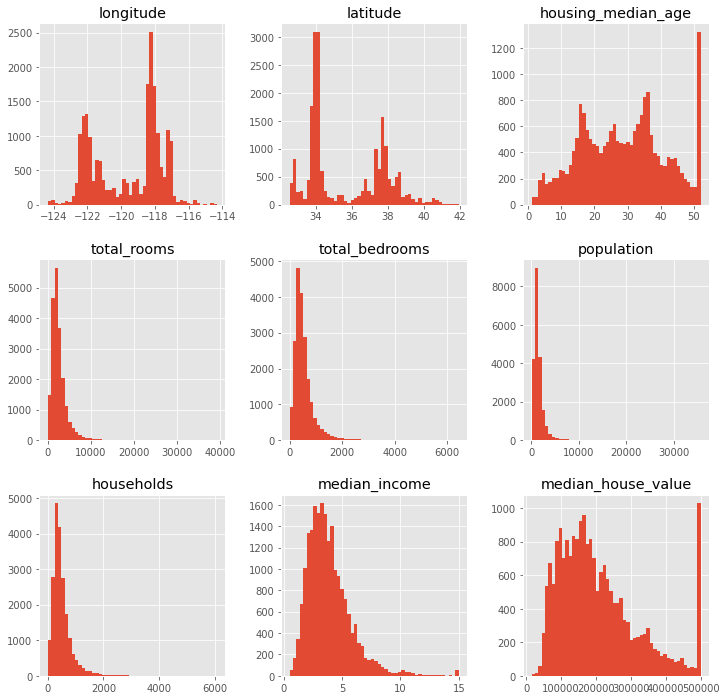

In [ ]:
from matplotlib import style
style.use('ggplot')
data.hist(bins=50,figsize=(12,12))
plt.show()

In [ ]:
#splitting the features and target into random train and test subsets using train_test_split()
# target = 'median_house_value'
# features = [i for i in data.columns if i not in [target]]
X=data.drop(['median_house_value'],axis=1)
Y=data['median_house_value']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)
print(len(X_train))
print(len(X_test))

16512
4128


In [ ]:
train_data=X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12852,-121.37,38.68,35.0,1620.0,276.0,939.0,277.0,2.5542,INLAND,72900.0
125,-122.22,37.85,28.0,5287.0,1048.0,2031.0,956.0,5.4570,NEAR BAY,337300.0
12134,-117.16,33.92,12.0,3236.0,502.0,1610.0,502.0,4.7568,INLAND,143500.0
12825,-121.47,38.72,26.0,1708.0,299.0,911.0,290.0,4.0227,INLAND,99800.0
13814,-117.05,34.89,36.0,1199.0,260.0,665.0,229.0,3.7065,INLAND,62000.0
...,...,...,...,...,...,...,...,...,...,...
8561,-118.41,33.93,22.0,2514.0,605.0,1225.0,568.0,4.1818,<1H OCEAN,339700.0
11985,-117.49,34.02,21.0,3736.0,738.0,2021.0,640.0,4.4545,INLAND,142400.0
2054,-119.69,36.69,36.0,1432.0,269.0,836.0,237.0,2.1563,INLAND,88300.0
18747,-122.33,40.52,23.0,2801.0,507.0,1318.0,454.0,3.5081,INLAND,116700.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

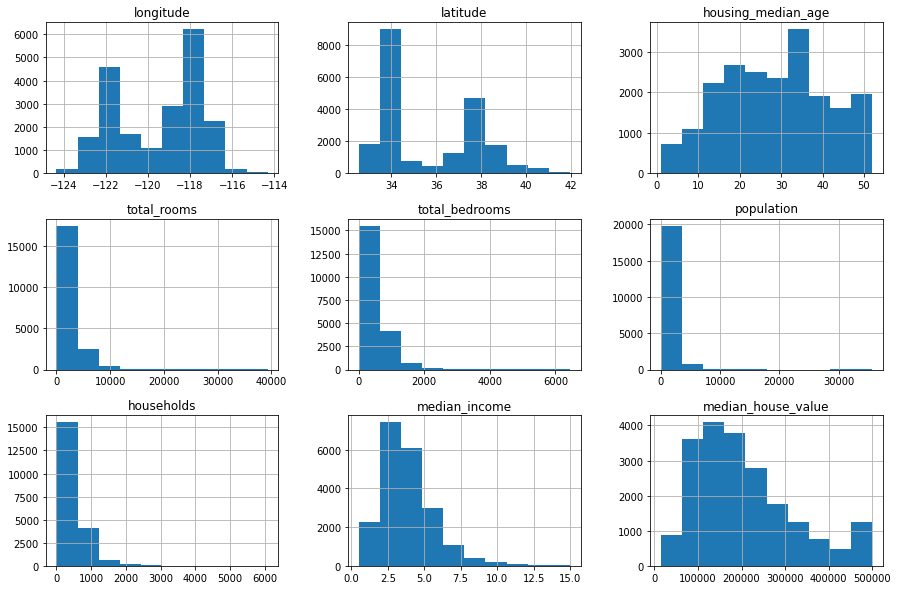

In [12]:
data.hist(figsize=(15,10))

In [13]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069259,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066657,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318999,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069259,-0.066657,-0.318999,0.927253,1.000000,0.873909,0.974724,-0.007681,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873909,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974724,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007681,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


<Axes: >

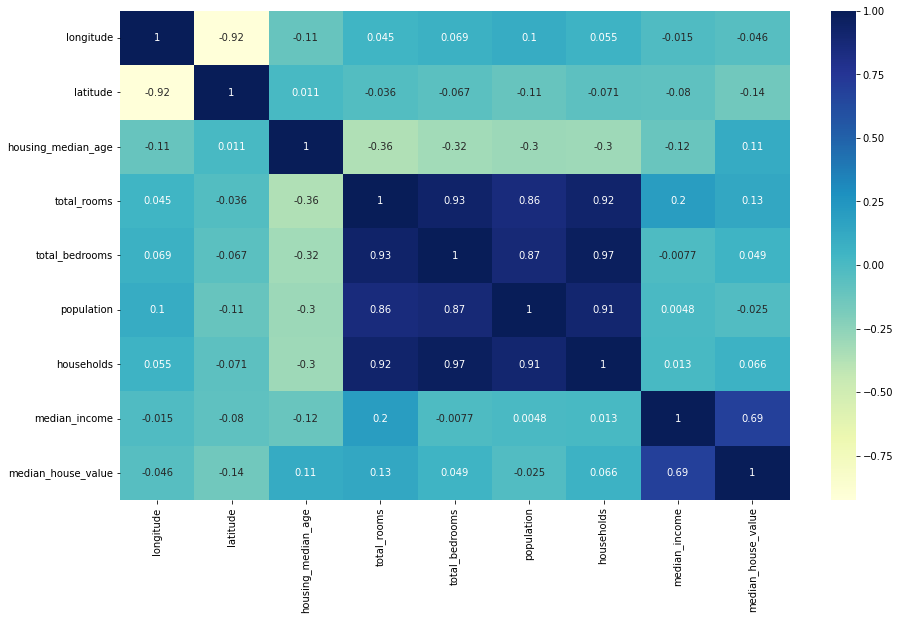

In [14]:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True, cmap='YlGnBu')

In [ ]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
data=data.join(pd.get_dummies(data.ocean_proximity))
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  <1H OCEAN           20640 non-null  uint8  
 11  INLAND              20640 non-null  uint8  
 12  ISLAND              20640 non-null  uint8  
 13  NEAR BAY            20640 non-null  uint8  
 14  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(9), object(1), uint8(5)
memory usage: 1.7+

In [17]:
data.drop(['ocean_proximity'],axis=1,inplace=True)

In [18]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


<Axes: >

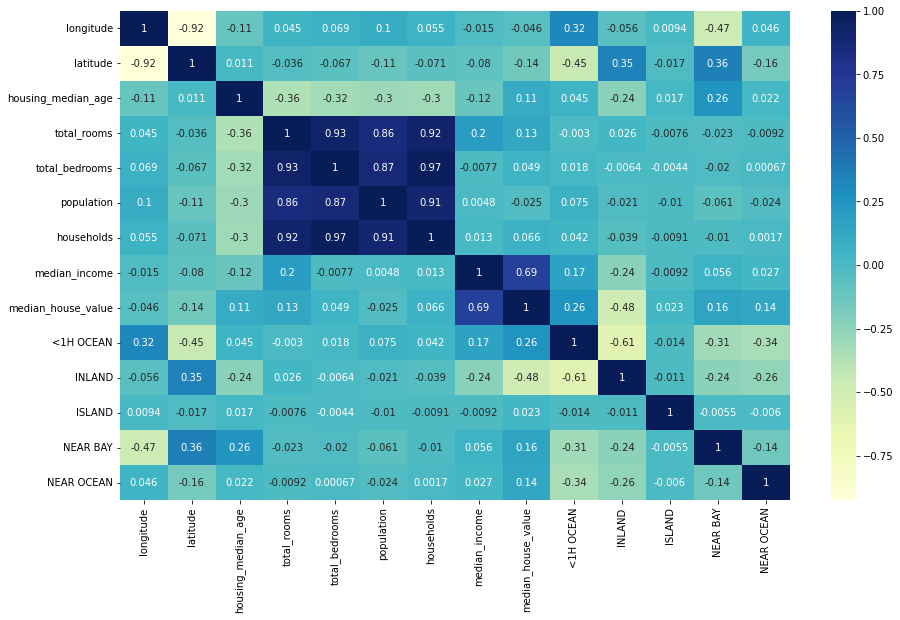

In [19]:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True, cmap='YlGnBu')

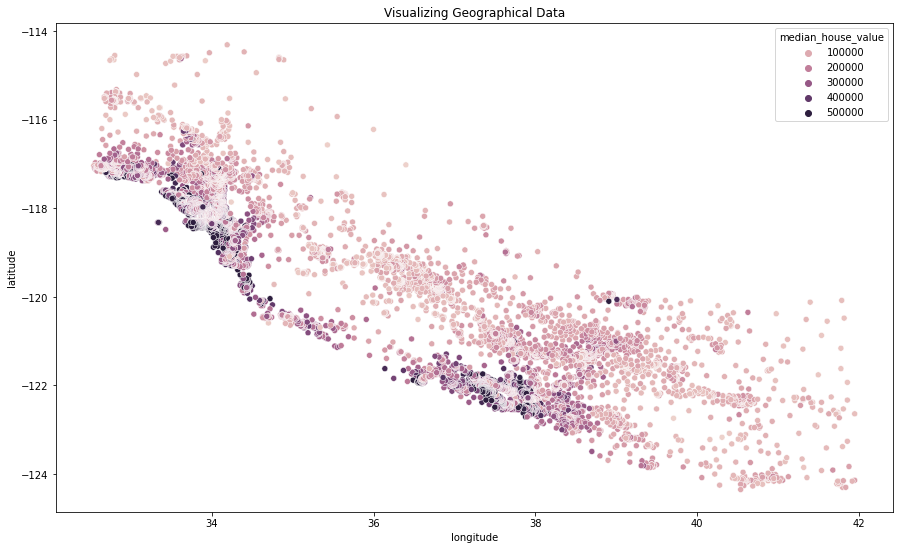

In [49]:
plt.figure(figsize=(15,9))
plt.title("Visualizing Geographical Data")
plt.xlabel('longitude')
plt.ylabel('latitude')
sns.scatterplot(x = "latitude", y = "longitude", data = data,hue="median_house_value")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #initialise the model
X_train=train_data.drop(['median_house_value'],axis=1)
Y_train=train_data['median_house_value']
regressor.fit(X_train,Y_train)

LinearRegression()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
regressor = LinearRegression() #initialise the model
X=data.drop(['median_house_value'],axis=1)
Y=data['median_house_value']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)
# fit the model
regressor.fit(X_train,Y_train)
# predict the data that are in test and compare them to the Y data in test
Y_pred=regressor.predict(X_test)
print (Y_pred) 
print(Y_test) 


[278868.82597223 182571.44394545 106986.27448692 ... 108803.56995313
 246609.76872672 246547.36566902]
19155    253000.0
8510     237500.0
1255      75000.0
15208    241500.0
2149      61900.0
           ...   
7367     170600.0
16559    119400.0
9993     163500.0
8908     340500.0
4705     396000.0
Name: median_house_value, Length: 4128, dtype: float64


In [23]:
regressor.score(X_test,Y_test)

0.6486656174143761

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
regressor = LinearRegression() #initialise the model
X=data.drop(['median_house_value'],axis=1)
Y=data['median_house_value']
scaler=StandardScaler()   #initiatilise StandardScaler
X_std=scaler.fit_transform(X)   #apply stardardisation
X_std
X_train, X_test, Y_train, Y_test=train_test_split(X_std,Y,test_size=0.2)
# fit the model again
regressor.fit(X_train,Y_train)

LinearRegression()

In [28]:
regressor.score(X_test,Y_test)

0.6539541782077307

In [31]:
from sklearn.tree import DecisionTreeRegressor
# define the model
model = DecisionTreeRegressor(max_depth=4,random_state = 0) 
# fit the model
model.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=4, random_state=0)

In [33]:
model.score(X_test,Y_test)

0.6032811889404334

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(X_train,Y_train)

RandomForestRegressor()

In [43]:
forest.score(X_test,Y_test)

0.8137186772515244

In [46]:
from sklearn.model_selection import GridSearchCV
#  find Hyperparameter Tuning
# Create the parameter grid for GridSearchCV
param_grid_search = {
    'max_depth': [80], # Maximum number of levels in each decision tree
    'max_features': [8, 10], # Maximum number of features considered for splitting a node
    'n_estimators': [100, 300] # Number of trees in the forest
}

param_grid_search = GridSearchCV(estimator = forest, param_grid = param_grid_search,  cv = 3, scoring="neg_mean_squared_error", return_train_score=True)
param_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [80], 'max_features': [8, 10],
                         'n_estimators': [100, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
best_score =param_grid_search.best_estimator_
best_score

RandomForestRegressor(max_depth=80, max_features=8)

In [48]:
best_score.score(X_test ,Y_test)

0.8182872520237505